<h2 style="text-align:center;">Hierarchical Clustering</h2>

### 📌 Introduction
Hierarchical Clustering is an **unsupervised machine learning technique** used to group data into clusters.
Unlike K-Means, it does not require pre-defining the number of clusters, and instead builds a **hierarchy of clusters** represented by a dendrogram.


### 🧠 Theory of Hierarchical Clustering

1. **What is Hierarchical Clustering?**
   - A clustering method that builds a hierarchy of clusters by either:
     - **Agglomerative (Bottom-Up):** Start with individual points, merge step by step.
     - **Divisive (Top-Down):** Start with all points in one cluster, then split.

2. **Dendrogram:**
   - A tree-like diagram that shows how points are merged/split.
   - Helps in deciding the optimal number of clusters.

3. **Linkage Methods:**
   - **Ward’s Method** → minimizes variance within clusters (most common).
   - **Complete Linkage** → based on farthest distance.
   - **Average Linkage** → based on average distance.

4. **Key Notes:**
   - Useful for small to medium datasets (computationally expensive for very large ones).
   - No need to specify k in advance (can cut dendrogram at desired level).
   - More interpretable compared to K-Means.


### 📊 Dataset
We will use the **Mall Customers dataset** again, focusing on:
- Annual Income  
- Spending Score  

Our goal is to cluster customers based on these two features.


In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../data/Mall_Customers.csv")

# Selecting relevant features (Annual Income, Spending Score)
X = df.iloc[:, [3, 4]].values  # ➤ X will contain the two columns for clustering

# Display first 5 rows
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),k-mea
0,1,Male,19,15,39,NaN
1,2,Male,21,15,81,NaN
2,3,Female,20,16,6,NaN
3,4,Female,23,16,77,NaN
4,5,Female,31,17,40,NaN


### 🌳 Dendrogram
We use a **dendrogram** to visualize how clusters are formed and decide the optimal number of clusters.


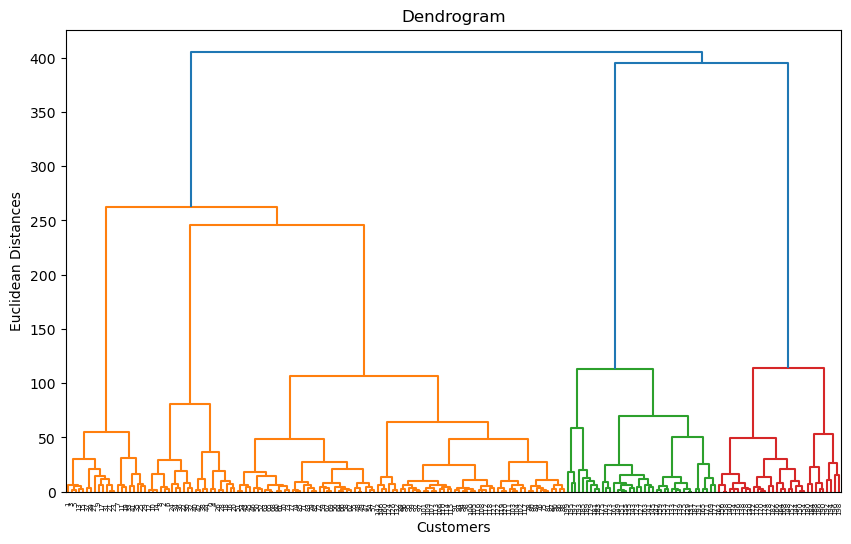

In [2]:
import scipy.cluster.hierarchy as sch

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()


### 🤖 Agglomerative Clustering
From the dendrogram, we choose **5 clusters** for consistency with K-Means.


In [4]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with k=5
hc = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
y_hc = hc.fit_predict(X)  # ➤ y_hc contains cluster labels for each data point

# Add cluster labels to dataframe
df["Cluster"] = y_hc

# Display sample with cluster assignments
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),k-mea,Cluster
0,1,Male,19,15,39,NaN,4
1,2,Male,21,15,81,NaN,3
2,3,Female,20,16,6,NaN,4
3,4,Female,23,16,77,NaN,3
4,5,Female,31,17,40,NaN,4


### 📈 Visualizing the Clusters
We plot customers based on **Annual Income vs Spending Score**, 
with each cluster represented by a different color.


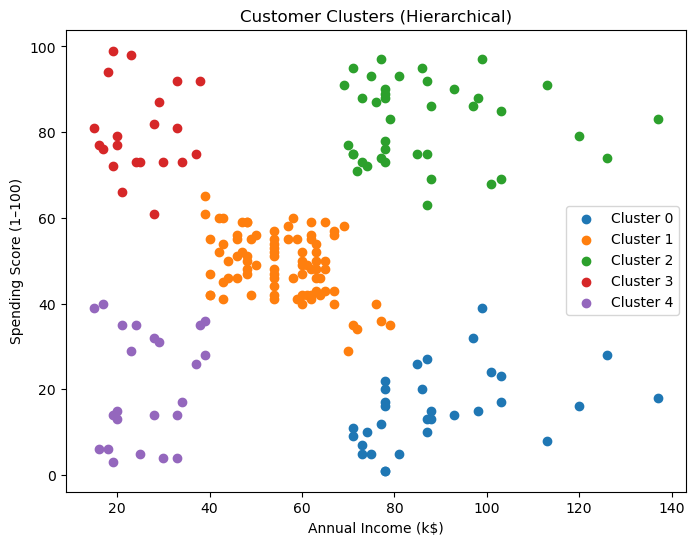

In [5]:
# Visualizing clusters
plt.figure(figsize=(8,6))

# Plot each cluster
for cluster in range(5):
    plt.scatter(X[y_hc == cluster, 0], X[y_hc == cluster, 1], label=f"Cluster {cluster}")

plt.title("Customer Clusters (Hierarchical)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()


### 💾 Saving Results
We can save the clustered dataset for future use.


In [6]:
# Save clustered dataset
df.to_csv("Hierarchy_Clustering.csv", index=False)
print("Clustered dataset saved as 'Hierarchy_Clustering.csv'")  # ➤ Confirmation


Clustered dataset saved as 'Hierarchy_Clustering.csv'


<h2 style="text-align:center;">📌 Summary</h2>

- Imported dataset and selected relevant features (Annual Income, Spending Score).  
- Plotted a **dendrogram** to visualize hierarchical merges.  
- Applied **Agglomerative Clustering with k=5**.  
- Visualized the clusters.  
- Saved final clustered dataset.  

👉 Hierarchical Clustering is more interpretable than K-Means and useful for smaller datasets where relationships among clusters matter.
